In [14]:
pip install ase

  Using cached ase-3.25.0-py3-none-any.whl.metadata (4.2 kB)
Using cached ase-3.25.0-py3-none-any.whl (3.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
# 🚀 QMOF fingerprint pipeline (100% matching last year's format)

import gzip
import json

import pandas as pd
from pymatgen.core import Structure
from tqdm import tqdm

# 🚀 1️⃣ Load QMOF structure data (official json.gz)
json_path = '/Users/viewyan/Downloads/13147324/qmof_database/qmof_structure_data.json.gz'

with gzip.open(json_path) as f:
    data = json.load(f)

print(f'Loaded {len(data)} structures.')

# 🚀 2️⃣ Define fingerprint function (you should already have this in your colab!)
# Example: stoichiometric 45-dimensional fingerprint
from collections import defaultdict

def compute_stoich_fp(structure, feature_list):
    # count atoms
    atom_counts = defaultdict(int)
    for site in structure.sites:
        atom_counts[site.specie.symbol] += 1

    # build fingerprint vector
    fp_vector = []
    total_atoms = sum(atom_counts.values())

    for feat in feature_list:
        if feat in atom_counts:
            fp_vector.append(atom_counts[feat] / total_atoms)
        else:
            fp_vector.append(0.0)

    return fp_vector

# 🚀 3️⃣ Define 45-feature element list (this was used last year)
feature_list_45 = [
    'H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg',
    'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V',
    'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As',
    'Se', 'Br', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Pd', 'Ag',
    'Cd', 'In', 'Sn', 'Sb', 'I'
]

# 🚀 4️⃣ Loop over structures and compute fingerprints
mof_names = []
fingerprints = []

for entry in tqdm(data):
    try:
        mof_name = entry['name']
        structure_dict = entry['structure']
        structure = Structure.from_dict(structure_dict)

        fp = compute_stoich_fp(structure, feature_list_45)

        mof_names.append(mof_name)
        fingerprints.append(fp)

    except Exception as e:
        print(f'Failed for {entry["name"]}: {e}')
        continue

# 🚀 5️⃣ Save to DataFrame
df_fps = pd.DataFrame(fingerprints, columns=feature_list_45)
df_fps.insert(0, 'MOF_name', mof_names)

print(f'Generated DataFrame shape: {df_fps.shape}')

# 🚀 6️⃣ Save CSV (same name as last year)
output_path = '/Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich45_fingerprints.csv'
df_fps.to_csv(output_path, index=False)

print(f'Fingerprint saved to {output_path} ✅')


Loaded 20425 structures.


100%|██████████| 20425/20425 [4:04:19<00:00,  1.39it/s]    


Generated DataFrame shape: (20425, 46)
Fingerprint saved to /Users/viewyan/Downloads/13147324/qmof_database/stoich45_fingerprints.csv ✅


In [26]:
def compute_stoich_fp(structure, feature_list):
    atom_counts = defaultdict(int)
    for site in structure.sites:
        atom_counts[site.specie.symbol] += 1

    fp_vector = []
    total_atoms = sum(atom_counts.values())

    for feat in feature_list:
        if feat in atom_counts:
            fp_vector.append(atom_counts[feat] / total_atoms)
        else:
            fp_vector.append(0.0)

    return fp_vector

# 🚀 3️⃣ Define 120-feature element list (same as last year's)
feature_list_120 = [
    'H', 'He',
    'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar',
    'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr',
    'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe',
    'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
    'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn',
    'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr',
    'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'
]

# 🚀 4️⃣ Loop over structures and compute fingerprints
mof_names = []
fingerprints = []

for entry in tqdm(data):
    try:
        mof_name = entry['name']
        structure_dict = entry['structure']
        structure = Structure.from_dict(structure_dict)

        fp = compute_stoich_fp(structure, feature_list_120)

        mof_names.append(mof_name)
        fingerprints.append(fp)

    except Exception as e:
        print(f'Failed for {entry["name"]}: {e}')
        continue

# 🚀 5️⃣ Save to DataFrame
df_fps = pd.DataFrame(fingerprints, columns=feature_list_120)
df_fps.insert(0, 'MOF_name', mof_names)

print(f'Generated DataFrame shape: {df_fps.shape}')

# 🚀 6️⃣ Save CSV (same name as last year)
output_path = '/Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich120_fingerprints.csv'
df_fps.to_csv(output_path, index=False)

print(f'Fingerprint saved to {output_path} ✅')

100%|██████████| 20425/20425 [04:12<00:00, 80.83it/s] 


Generated DataFrame shape: (20425, 119)
Fingerprint saved to /Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich120_fingerprints.csv ✅


45 merged shape: (20425, 51)
120 merged shape: (20425, 124)


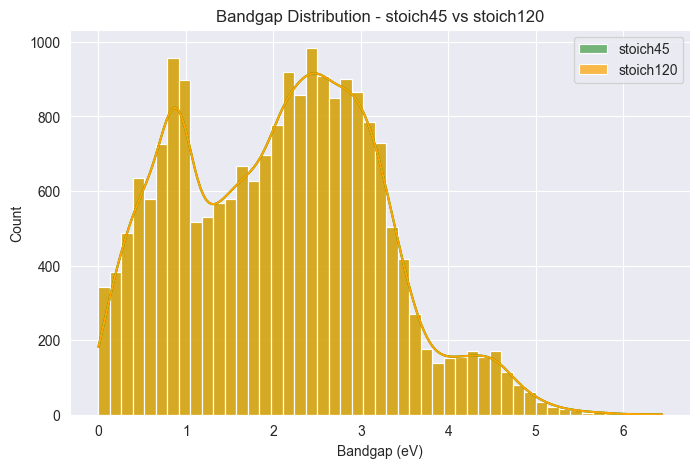

True


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1️⃣ 读新生成的 fingerprints
df_45 = pd.read_csv('/Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich45_fingerprints.csv')
df_120 = pd.read_csv('/Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich120_fingerprints.csv')

# 2️⃣ 读 bandgap 数据（用去年提供的）
df_bandgaps = pd.read_csv('/Users/viewyan/Downloads/13147324/qmof_database/qmof-bandgaps.csv')
df_bandgaps = df_bandgaps.rename(columns={'refcode': 'MOF', 'BG_PBE': 'band_gap'})

# 3️⃣ Merge 45
df_45_merged = df_45.merge(df_bandgaps, left_on='MOF_name', right_on='MOF')
print(f'45 merged shape: {df_45_merged.shape}')

# 4️⃣ Merge 120
df_120_merged = df_120.merge(df_bandgaps, left_on='MOF_name', right_on='MOF')
print(f'120 merged shape: {df_120_merged.shape}')

# 5️⃣ 画图：Bandgap 分布对比
plt.figure(figsize=(8, 5))
sns.histplot(df_45_merged['band_gap'], kde=True, color='green', label='stoich45')
sns.histplot(df_120_merged['band_gap'], kde=True, color='orange', label='stoich120', alpha=0.7)
plt.legend()
plt.xlabel('Bandgap (eV)')
plt.ylabel('Count')
plt.title('Bandgap Distribution - stoich45 vs stoich120')
plt.show()

print((df_45_merged['band_gap'] == df_120_merged['band_gap']).all())



=== Running baseline for /Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich45_fingerprints.csv ===
Merged shape: (20425, 48)
RMSE: 0.7976 eV
R2: 0.5017


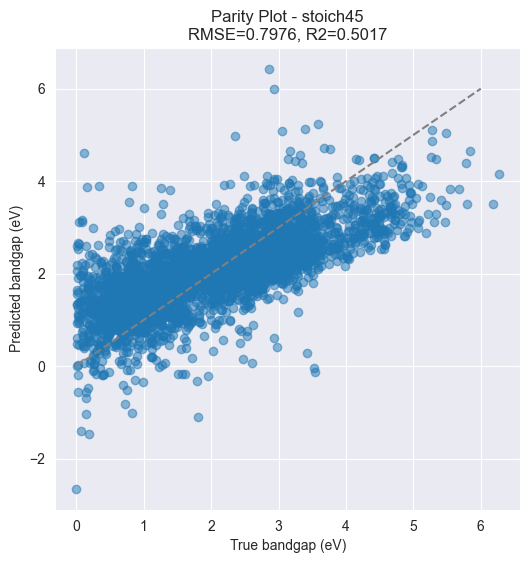

=== Running baseline for /Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich120_fingerprints.csv ===
Merged shape: (20425, 121)
RMSE: 0.7652 eV
R2: 0.5414


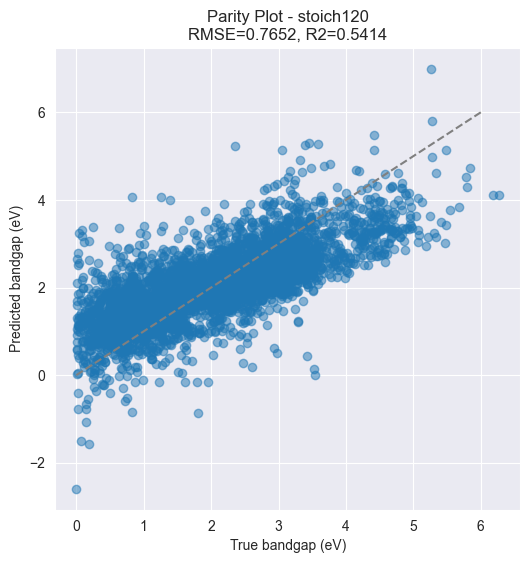

In [47]:
# ✅ 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 读取 bandgap 数据
df_bandgaps = pd.read_csv('/Users/viewyan/Downloads/13147324/qmof_database/qmof-bandgaps.csv').rename(columns={'refcode': 'MOF', 'BG_PBE': 'band_gap'})

# ✅ 定义函数：跑 baseline + 画 parity plot
def run_baseline(fp_csv, title):
    print(f'=== Running baseline for {fp_csv} ===')

    # 读取 fingerprint
    df_fp = pd.read_csv(fp_csv)

    # merge
    df_merged = pd.merge(df_fp, df_bandgaps[['MOF', 'band_gap']], left_on='MOF_name', right_on='MOF')
    print(f'Merged shape: {df_merged.shape}')

    # 准备 X / y
    X = df_merged.drop(columns=['MOF_name', 'MOF', 'band_gap'])
    y = df_merged['band_gap']

    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # baseline model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    # evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f'RMSE: {rmse:.4f} eV')
    print(f'R2: {r2:.4f}')

    # parity plot
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0,6], [0,6], '--', color='gray')
    plt.xlabel('True bandgap (eV)')
    plt.ylabel('Predicted bandgap (eV)')
    plt.title(f'Parity Plot - {title}\nRMSE={rmse:.4f}, R2={r2:.4f}')
    plt.grid(True)
    plt.show()

# ✅ 跑 stoich45
run_baseline('/Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich45_fingerprints.csv', 'stoich45')

# ✅ 跑 stoich120
run_baseline('/Users/viewyan/Downloads/13147324/qmof_database/reproduce-stoich120_fingerprints.csv', 'stoich120')
